<a href="https://colab.research.google.com/github/PenroseTiles/Tensorflow2.0_Tutorials/blob/master/PML_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
try:
  %tensorflow_version 2.x
except Exception:
  exit(0)

import tensorflow as tf
from tensorflow import keras
from typing import List, Dict, Callable
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import matplotlib

mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
import plotly


11493376/11490434 [==============================] - 0s 0us/step


In [5]:
x_train.shape

(60000, 28, 28)

In [0]:
def flatten_dataset(data: np.array) ->np.array:
  return data.reshape(data.shape[0],-1)

x_train = flatten_dataset(x_train)
x_test = flatten_dataset(x_test)

In [7]:
x_train.shape

(60000, 784)

In [0]:
def normalize(x_train, x_test):
  mean = np.mean(x_train, axis=0)
  x_train = x_train - mean
  x_test = x_test- mean 
  return x_train, x_test

In [0]:
#normalize to have zero mean
x_train, x_test = normalize(x_train, x_test)

In [0]:
#A = X^T X
A = np.dot(x_train.T, x_train)

In [11]:
#CHECK THAT A IS SYMMETRIC
np.all(A==A.T)

True

In [0]:
#find eigenvectors and eigenvalues of a symmetric matrix
vals, vecs = np.linalg.eigh(A)

In [13]:
#Eigenvalues are already sorted
np.all(np.sort(vals)==vals)

True

In [0]:
#select the 3 eigenvectors with largest eigenvalues
principal = vecs[:,-3:]

In [0]:
#project the (normalized) training dataset onto this space
projected = np.dot(x_train, vecs)

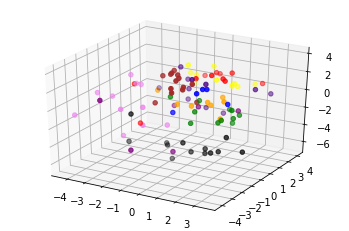

In [36]:
#plotting
fid = plt.figure()
ax = plt.axes(projection='3d')

# Data for three-dimensional scattered points
zdata = projected[:100,-1]
xdata = projected[:100,-3]
ydata = projected[:100,-2]
colors = ['black','brown','purple','violet','indigo','blue','green','yellow','orange','red']
ax.scatter3D(xdata, ydata, zdata, c=y_train[:100], cmap=matplotlib.colors.ListedColormap(colors));

In [0]:
def pairwise_distance(x, proj):
  num_examples = min(5000,x.shape[0])
  total_dist = 0.
  for i in range(num_examples):
    for j in range(i):
      total_dist += np.sum((x[i,:] - x[j,:])**2) - np.sum((proj[i,:] - proj[j,:])**2)
  return total_dist/(num_examples**2)

In [42]:
pairwise_distance(x_train, projected)

6.485845833736903e-15

In [33]:
pairwise_distance(x_train)

65.3694947167069

VAE